# Conexion a la base de datos

In [1]:
# se importa la libreria que permite conectar SQL con Python 
import mysql.connector

# Conecto en base a mis datos
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

 # 1era opcion(esta opcion devuelve los datos en un formato crudo)
 
# cursor = conn.cursor()

# q = "SELECT nombre, apellido from clientes where cliente_id = 1"
# cursor.execute(q)
# resultado = cursor.fetchall()

# for row in resultado:
#     print(row)
    
# conn.commit()  # Confirmamos nuestra consulta
# cursor.close() # Cerramos el cursos
# conn.close()  # Cerramos la conexion 


# 2da opcion
# En este caso vamos a tener el resultado de la query en un dataframe gracias a Pandas 

import pandas as pd


cursor = conn.cursor()

cursor.execute("""
               
      SELECT * 
      FROM clientes ;
      
""")

resultado = cursor.fetchall()
df_res = pd.DataFrame(resultado)


conn.commit()   
cursor.close()
conn.close() 

In [2]:
df_res.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,Sofía,Díaz,sofía.díaz@prueba.com,4111373679,3 Calle 1,Quito,Venezuela,9590,2024-08-27 10:25:21,2024-08-27 10:25:21
1,2,Andrés,Sánchez,andrés.sánchez@mail.com,1113361144,863 Calle Secundaria,Buenos Aires,Chile,5947,2024-08-27 10:25:21,2024-08-27 10:25:21
2,3,Ana,Pérez,ana.pérez@mail.com,6226817737,425 Calle 3,Buenos Aires,Brasil,5172,2024-08-27 10:25:21,2024-08-27 10:25:21
3,4,Luis,Rodríguez,luis.rodríguez@prueba.com,3243223636,905 Calle 1,Lima,Chile,4585,2024-08-27 10:25:21,2024-08-27 10:25:21
4,5,Carlos,Sánchez,carlos.sánchez@prueba.com,1177179448,156 Calle 2,Montevideo,Chile,6716,2024-08-27 10:25:21,2024-08-27 10:25:21


In [3]:
# En este caso quise probar la funcion de Pandas de leer directamente la query mediante pd.read_sql_query

conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT *
    FROM pedidos
    
;
"""

df2 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 

df2

C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2087131865.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


,pedido_id,cliente_id,fecha_pedido,direccion_pedido,monto_total,estado_pedido,ultima_actualizacion
0,1,1,2024-08-03,"916 David Corner Apt. 331\nNorth Patrick, OR 5...",783.14,Enviado,2024-08-27 11:02:42
1,2,2,2024-07-06,"0717 Maria Throughway\nSouth Bobby, DE 67067",724.86,En_proceso,2024-08-27 11:02:54
2,3,3,2024-08-18,98819 Solomon Forge Apt. 540\nEast Catherinemo...,305.55,Entregado,2024-08-27 11:02:54
3,4,4,2023-09-29,"1479 Molina Pines Apt. 451\nGreentown, MO 94659",122.19,Entregado,2024-08-27 11:02:54
4,5,5,2024-02-07,"04668 John Pike\nAmyport, PW 28211",729.53,Enviado,2024-08-27 11:02:54
...,...,...,...,...,...,...,...
1996,1997,1997,2023-10-27,"911 Franklin Tunnel\nWernerfort, GU 61957",877.27,En_proceso,2024-08-27 11:02:57
1997,1998,1998,2024-02-20,"3347 Scott Road Apt. 729\nThomasmouth, PW 35680",466.38,Enviado,2024-08-27 11:02:57
1998,1999,1999,2023-11-11,"336 Young Mews\nNew Roy, OK 26865",795.33,Pendiente,2024-08-27 11:02:57
1999,2000,2000,2024-05-11,"972 Anderson Rue\nKariberg, FM 31959",246.24,Pendiente,2024-08-27 11:02:57


# Analisis de Datos

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT p.nombre, sum(dp.cantidad) AS Total_Ventas 
    FROM detalle_pedidos AS dp 
    JOIN productos AS p 
    ON dp.producto_id = p.producto_id 
    GROUP BY p.nombre 
    ORDER BY Total_Ventas 
    DESC LIMIT 5
    
;
"""

df3 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 


C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\3450687868.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


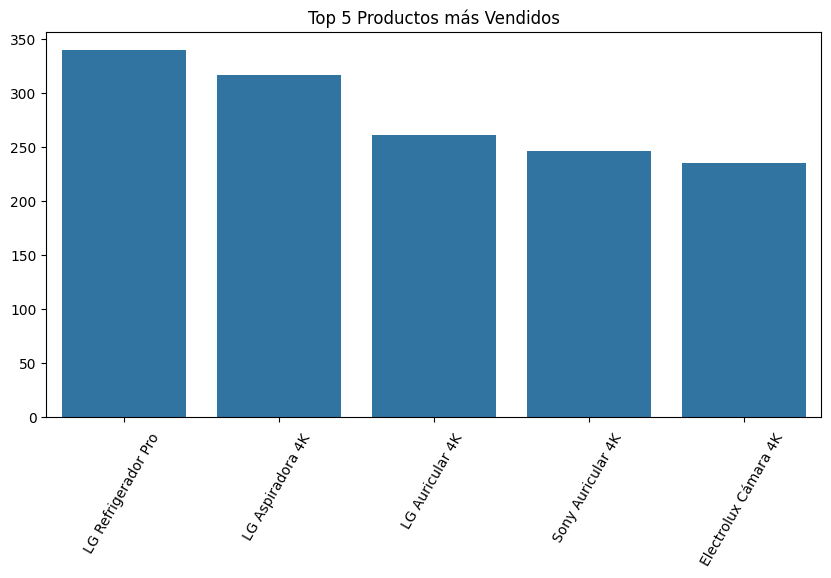

In [6]:
fig,ax= plt.subplots(figsize=(10,5))
sns.barplot(data= df3,x= 'nombre' ,y='Total_Ventas')
plt.title('Top 5 Productos más Vendidos')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 60)
plt.show()

In [7]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT CONCAT(c.nombre, ' ', c.apellido) AS Nombre_Completo, sum(p.monto_total) AS Total_Gastado 
    FROM pedidos p 
    JOIN clientes c 
    ON p.cliente_id = c.cliente_id 
    GROUP BY c.nombre, c.apellido 
    ORDER BY  Total_Gastado DESC
    LIMIT 10
    
;
"""

query_4 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 


C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2482871584.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_4 = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


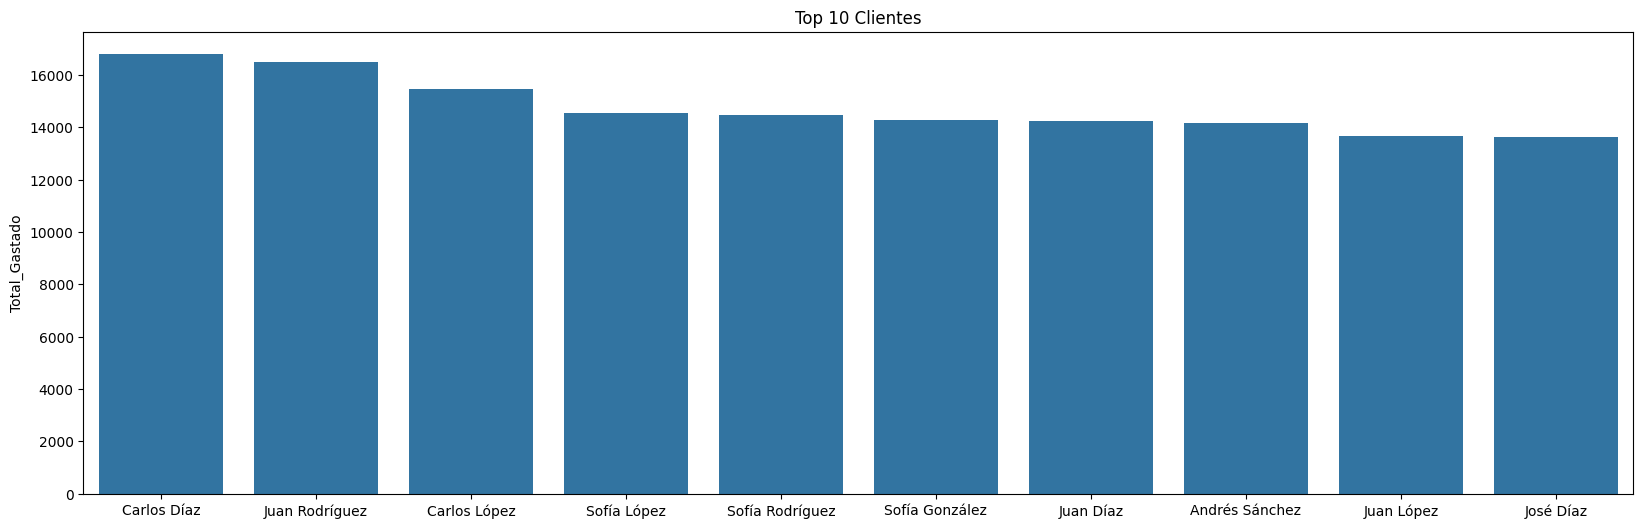

In [8]:
fig,ax= plt.subplots(figsize=(20,6))
sns.barplot(data= query_4,x='Nombre_Completo', y='Total_Gastado')
plt.xlabel('')
plt.title('Top 10 Clientes')
plt.show()

De que pais hay mas ventas?

In [9]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT c.pais, SUM(p.monto_total) as Cantidad
    FROM clientes c
    JOIN pedidos p
    ON c.cliente_id = p.cliente_id
    GROUP BY c.pais
;
"""

df_paises = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 


C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2018483271.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_paises = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


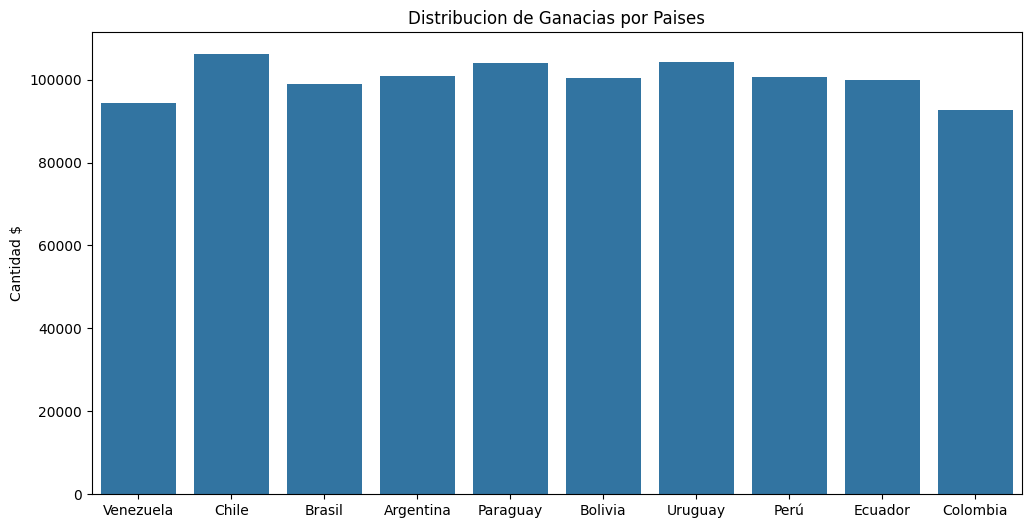

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=df_paises,x='pais',y='Cantidad')
plt.title('Distribucion de Ganacias por Paises')
plt.xlabel('')
plt.ylabel('Cantidad $')
plt.show()

In [11]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT estado_pedido, COUNT(*) AS Cantidad
    FROM pedidos
    GROUP BY estado_pedido
;
"""

df_condicion = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 


C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\3332001466.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_condicion = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


In [12]:
df_condicion

,estado_pedido,Cantidad
0,Enviado,414
1,En_proceso,382
2,Entregado,399
3,Cancelado,397
4,Pendiente,409


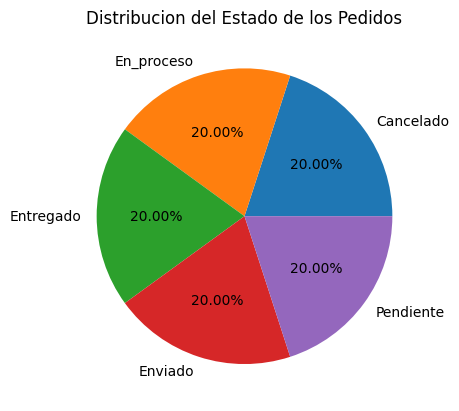

In [13]:
Groupby = df_condicion.groupby('estado_pedido').size().to_frame(name='Cantidad')

cantidad = Groupby['Cantidad'].tolist()
estado = Groupby.index.tolist()

plt.pie(cantidad, labels=estado, autopct="%1.2f%%") 
plt.title("Distribucion del Estado de los Pedidos")
plt.show()

In [14]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT YEAR(fecha_pedido) AS Año, MONTH(fecha_pedido) AS Mes, SUM(monto_total) AS Ventas
    FROM pedidos
    WHERE fecha_pedido >= DATE_SUB(CURDATE(), INTERVAL 1 YEAR)
    GROUP BY Año, Mes
    ORDER BY Año,Mes
;
"""

df_Distribucion = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 

C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2871197680.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Distribucion = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


Text(0, 0.5, 'Ventas $')

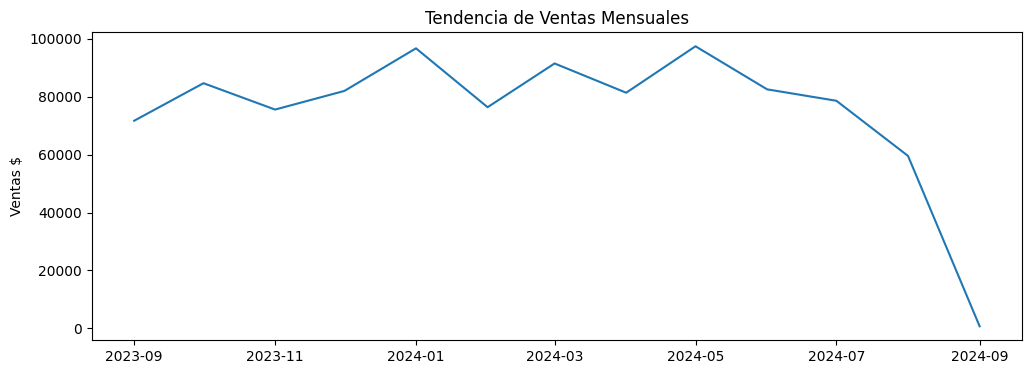

In [15]:
df_Distribucion['Fecha'] = pd.to_datetime(df_Distribucion[['Año', 'Mes']].rename(columns={'Año': 'year', 'Mes': 'month'}).assign(day=1))
fig,ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=df_Distribucion, x='Fecha', y='Ventas')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('')
plt.ylabel('Ventas $')

In [16]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT SUM(p.monto_total) AS Ventas, pa.metodo 
    FROM pedidos p
    JOIN pagos pa on p.pedido_id = pa.pedido_id
    GROUP BY pa.metodo
;
"""

df_metodo_pagos = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 

C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2850487822.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_metodo_pagos = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


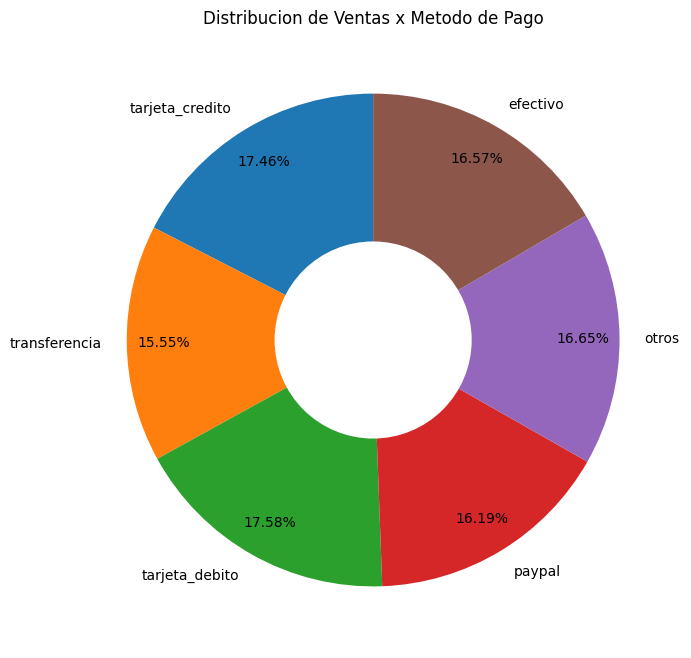

In [17]:
plt.figure(figsize=(8,8))
plt.pie(df_metodo_pagos['Ventas'],labels=df_metodo_pagos['metodo'], autopct='%1.2f%%',startangle=90,pctdistance=0.85)

circulo = plt.Circle((0,0),0.40, fc='white')
plt.gca().add_artist(circulo)

plt.title('Distribucion de Ventas x Metodo de Pago')
plt.show()

In [18]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT 
    DATE_FORMAT(pe.fecha_pedido, '%Y-%m') AS Mes, 
    c.nombre AS Categoria, 
    SUM(dp.cantidad * dp.precio - dp.descuento) AS Ventas
    FROM detalle_pedidos dp
    JOIN productos p ON dp.producto_id = p.producto_id
    JOIN categorias c ON p.categoria_id = c.categoria_id
    JOIN pedidos pe ON dp.pedido_id = pe.pedido_id
    GROUP BY Mes, Categoria
    ORDER BY Mes
;
"""

df_Categorias = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 

C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\3883485258.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Categorias = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


<Figure size 1800x2000 with 0 Axes>

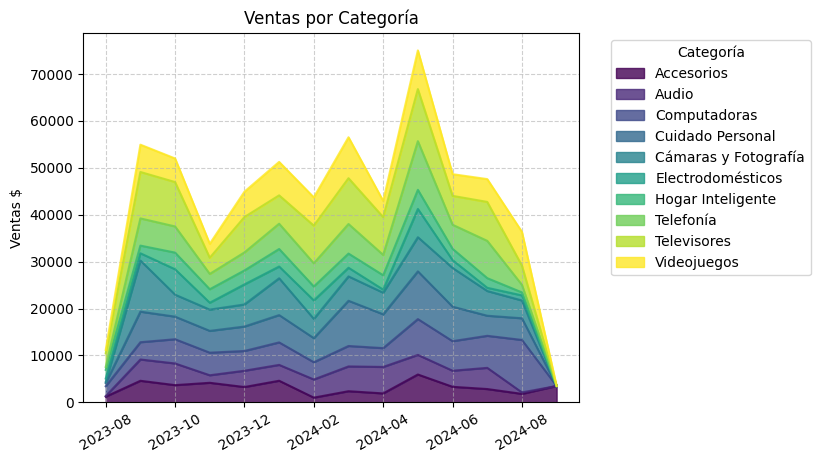

In [19]:
pivot = df_Categorias.pivot(index='Mes', columns='Categoria', values='Ventas')

plt.figure(figsize=(18, 20))
pivot.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)

plt.title('Ventas por Categoría')

plt.xlabel('')
plt.ylabel('Ventas $')
plt.xticks(rotation=30)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)



plt.show()

In [20]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="",
  password="",
  database="tecnohogar"
)

cursor = conn.cursor()

q = """
    SELECT  *
    FROM detalle_pedidos 
   
;
"""

df_boxplot = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


#Cierre de forma manual por las dudas 
conn.commit()   
cursor.close()
conn.close() 

C:\Users\Pc\AppData\Local\Temp\ipykernel_16844\2801026254.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_boxplot = pd.read_sql_query(q,conn)   #Lectura en base a Pandas


In [21]:
df_boxplot

,detalle_id,pedido_id,cantidad,precio,descuento,producto_id
0,1,1,6,69.09,3.62,51
1,2,2,6,78.81,1.05,29
2,3,2,4,81.95,5.10,29
3,4,2,2,69.46,2.54,60
4,5,2,9,25.31,9.08,9
...,...,...,...,...,...,...
2002,2005,1,70,100.00,0.00,101
2003,2006,1,1,100.00,0.00,101
2004,2010,150,5,120.00,2.12,38
2005,2011,150,5,120.00,2.12,38


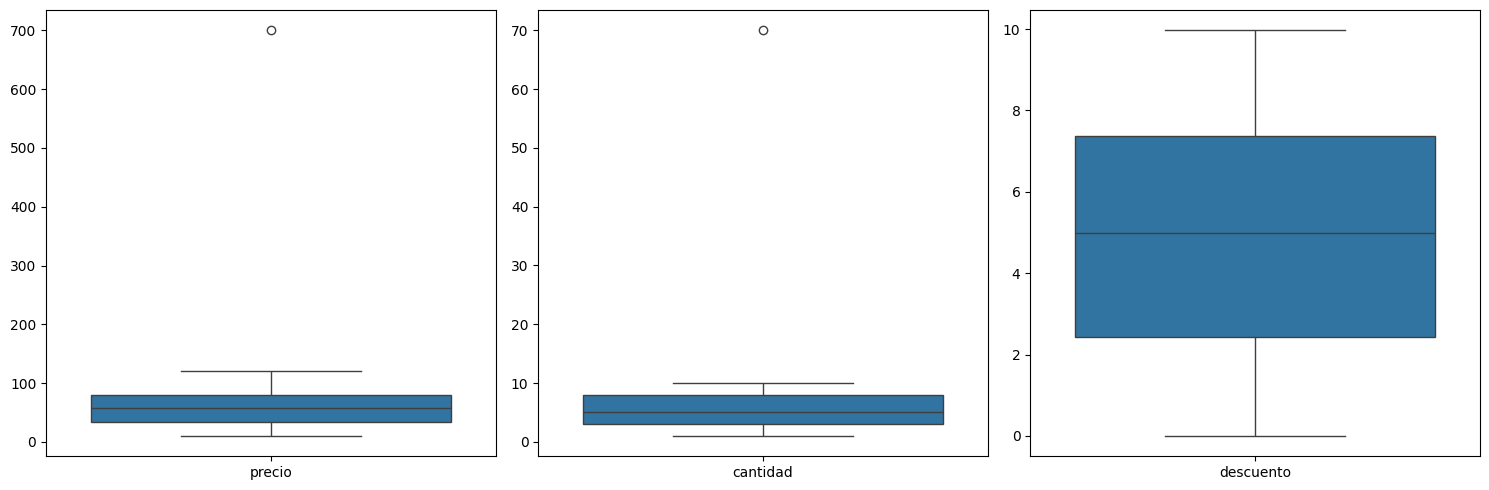

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot([df_boxplot['precio']], ax=axes[0])

sns.boxplot([df_boxplot['cantidad']], ax=axes[1])

sns.boxplot([df_boxplot['descuento']], ax=axes[2])

plt.tight_layout()
plt.show()
